In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  workclass_Federal-gov  workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               0                      0                    0   

   workclass_Private  ...  origin_descent_Asia  origin_descent_Carib  \
0                  0  ...                    0                     0   
1                  0  ...                    0                     0   
2                  1  ...                    0                     0   
3                  1  ...                    0                     0   
4                  1  ...                    0                     1   

   origin_descent_Central America  origin_descent_Europe  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   origin_descent_North America  origin_descent_South America  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   origin_descent_United States  age_range_adult  age_range_child  \
0                             1                1                0   
1                             1                1                0   
2                             1                1                0   
3                             1                1                0   
4                             0                1                0   

   age_range_senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 64 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
                                ...  
origin_descent_South America    int64
origin_descent_United States    int64
age_range_adult                 int64
age_range_child                 int64
age_range_senior                int64
Length: 64, dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             30162 non-null  int64
 1   fnlwght                         30162 non-null  int64
 2   education_num_yr                30162 non-null  int64
 3   cap_gain                        30162 non-null  int64
 4   cap_loss                        30162 non-null  int64
 5   hours_per_week                  30162 non-null  int64
 6   income_outcome                  30162 non-null  int64
 7   workclass_Federal-gov           30162 non-null  int64
 8   workclass_Local-gov             30162 non-null  int64
 9   workclass_Private               30162 non-null  int64
 10  workclass_Self-emp-inc          30162 non-null  int64
 11  workclass_Self-emp-not-inc      30162 non-null  int64
 12  workclass_State-gov             30162 non-null  int64
 13  w

In [7]:
ml_df = ml_data.copy()

In [8]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 




num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


====Iteration 0  ====

Accuracy:  0.8450190618266202 

Confusion Matrix: 
      0    1
0  4163  354
1   581  935 

====Iteration 1  ====

Accuracy:  0.8440245317420852 

Confusion Matrix: 
      0    1
0  4160  360
1   581  932 

====Iteration 2  ====

Accuracy:  0.843858776727996 

Confusion Matrix: 
      0    1
0  4177  364
1   578  914 



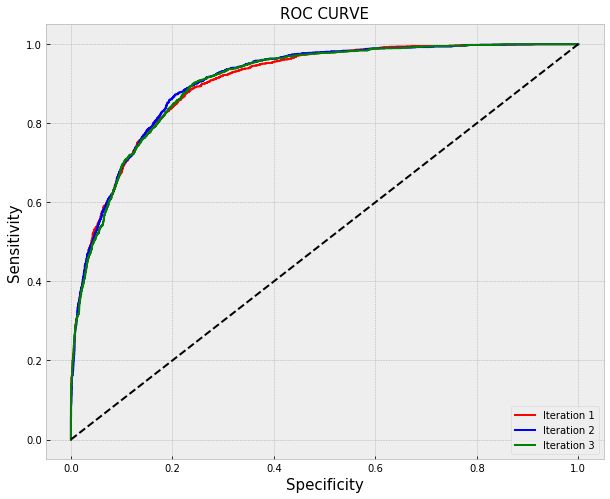

In [9]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [10]:
weights

array([[ 0.50595537,  0.07432245,  0.86237497,  2.31426   ,  0.2522191 ,
         0.24061768,  0.09518139, -0.01896923,  0.03839885,  0.04815013,
        -0.09253741, -0.04320627, -0.14988908, -0.02285728, -0.02204504,
        -0.01678862,  0.25110721, -0.17380284, -0.12863467, -0.07767173,
        -0.26827415, -0.33944322,  0.18039416,  0.07941552,  0.08279388,
         0.11042115, -0.03273816,  0.47823745, -0.21116366, -0.10128652,
        -0.50442404, -0.15047818,  0.47517494,  0.37167963,  0.02662366,
         0.2040099 , -0.05716015, -0.06478039,  0.04237733,  0.04451002,
        -0.06634903,  0.09881699,  0.01499095,  0.26079641, -0.0582018 ,
         0.03392266, -0.02830891, -0.03272537,  0.03251979, -0.01775787,
         0.01075351, -0.02347215,  0.02819481, -0.01307746, -0.01657496,
         0.02662366,  0.15767592, -0.13438388, -0.10095948],
       [ 0.49860326,  0.07529278,  0.91583249,  2.28760197,  0.25093318,
         0.24338611,  0.09385554, -0.02183218,  0.03485535,  0.

In [11]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [12]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8402121664180342 

Confusion Matrix: 
      0    1
0  4215  282
1   682  854 

====Iteration 1  ====

Accuracy:  0.8347422509530913 

Confusion Matrix: 
      0    1
0  4249  325
1   672  787 

====Iteration 2  ====

Accuracy:  0.8393833913475882 

Confusion Matrix: 
      0    1
0  4211  308
1   661  853 



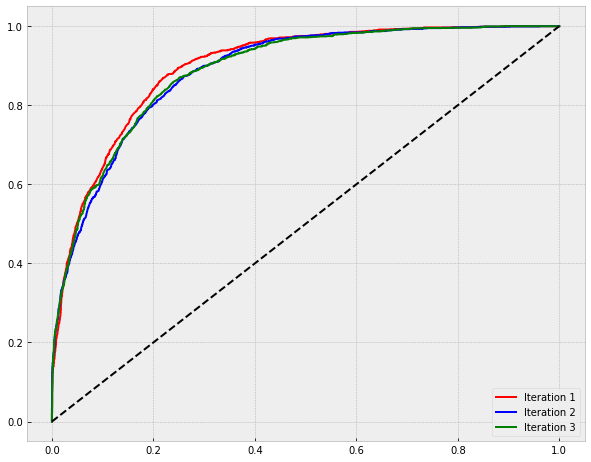

In [13]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("Confusion Matrix: ")
    print (pd.DataFrame(conf),"\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [14]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions
import time
from sklearn.svm import SVC

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")
    print('accuracy:', acc )
    print(conf)
    print(elapsed_time)
    
    iter_num += 1
    
    

====Iteration 0  ====

accuracy: 0.8559588927565058
[[4245  286]
 [ 583  919]]
36.215682447999995
====Iteration 1  ====

accuracy: 0.8443560417702636
[[4212  300]
 [ 639  882]]
33.784872140999994
====Iteration 2  ====

accuracy: 0.8453505718547986
[[4223  299]
 [ 634  877]]
35.494393560000006


In [15]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for (train_indices, test_indices) in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

In [16]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions
import time

t = time.process_time()

# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

elapsed_time = time.process_time() - t

print(elapsed_time)

accuracy: 0.8480026520802254
[[4238  310]
 [ 607  878]]
34.08774735499999


In [17]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8403, 59)
(8403,)
[4212 4191]


[[ 2.37065356e-01  5.82234228e-02  6.37000768e-01  1.81901854e+00
   1.81736506e-01  1.17054747e-01  4.16797511e-02 -1.73959039e-02
   2.05401461e-02  7.02109169e-02 -6.37362945e-02 -3.45494429e-02
  -1.25726588e-02 -2.58516288e-02 -7.30164020e-03 -7.36910363e-02
   2.03326309e-01 -1.08566801e-01 -8.19576063e-02 -7.10775649e-02
  -1.42013600e-01 -7.90591297e-02  1.38395825e-01  3.52885795e-02
   4.04186337e-02  9.00699907e-02 -5.74559170e-02  3.86564630e-01
  -2.26002214e-01 -5.98667509e-02 -2.64450187e-01 -1.47020711e-01
   2.75567041e-01  1.35176718e-01  1.18788203e-02  1.10900752e-01
  -5.77563070e-02  1.20285238e-02  9.70674309e-02 -3.84560544e-02
  -2.83091387e-02  1.35905996e-01 -3.59168853e-02  1.22638385e-01
  -3.17376717e-02  2.11829188e-02 -3.82086760e-03 -2.96152533e-02
   9.20732863e-03 -2.01937622e-02 -9.13605007e-03 -1.11295506e-02
   3.40969810e-03 -1.79519687e-02 -1.42622431e-02  1.18788203e-02
   7.46108908e-02  4.26325641e-14 -8.73437953e-02]]


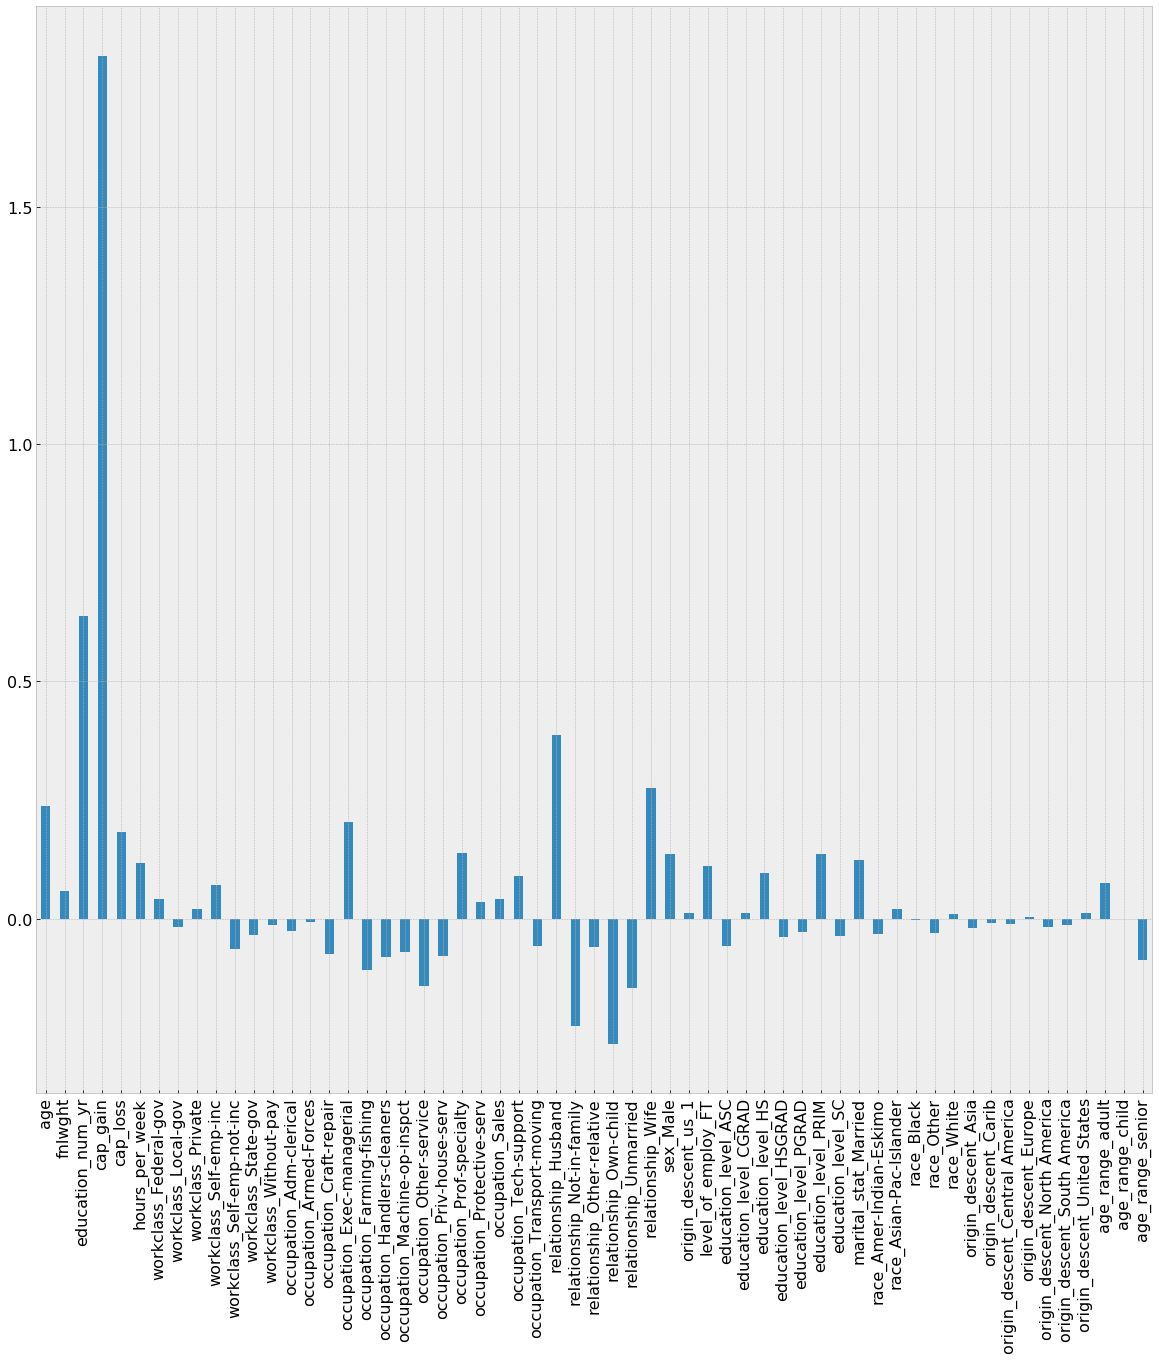

In [18]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [19]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the income_outcomw Column to the pandas support vectors dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8403 entries, 26288 to 23189
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             8403 non-null   int64
 1   fnlwght                         8403 non-null   int64
 2   education_num_yr                8403 non-null   int64
 3   cap_gain                        8403 non-null   int64
 4   cap_loss                        8403 non-null   int64
 5   hours_per_week                  8403 non-null   int64
 6   workclass_Federal-gov           8403 non-null   int64
 7   workclass_Local-gov             8403 non-null   int64
 8   workclass_Private               8403 non-null   int64
 9   workclass_Self-emp-inc          8403 non-null   int64
 10  workclass_Self-emp-not-inc      8403 non-null   int64
 11  workclass_State-gov             8403 non-null   int64
 12  workclass_Without-pay           8403 non-null   int64
 13

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

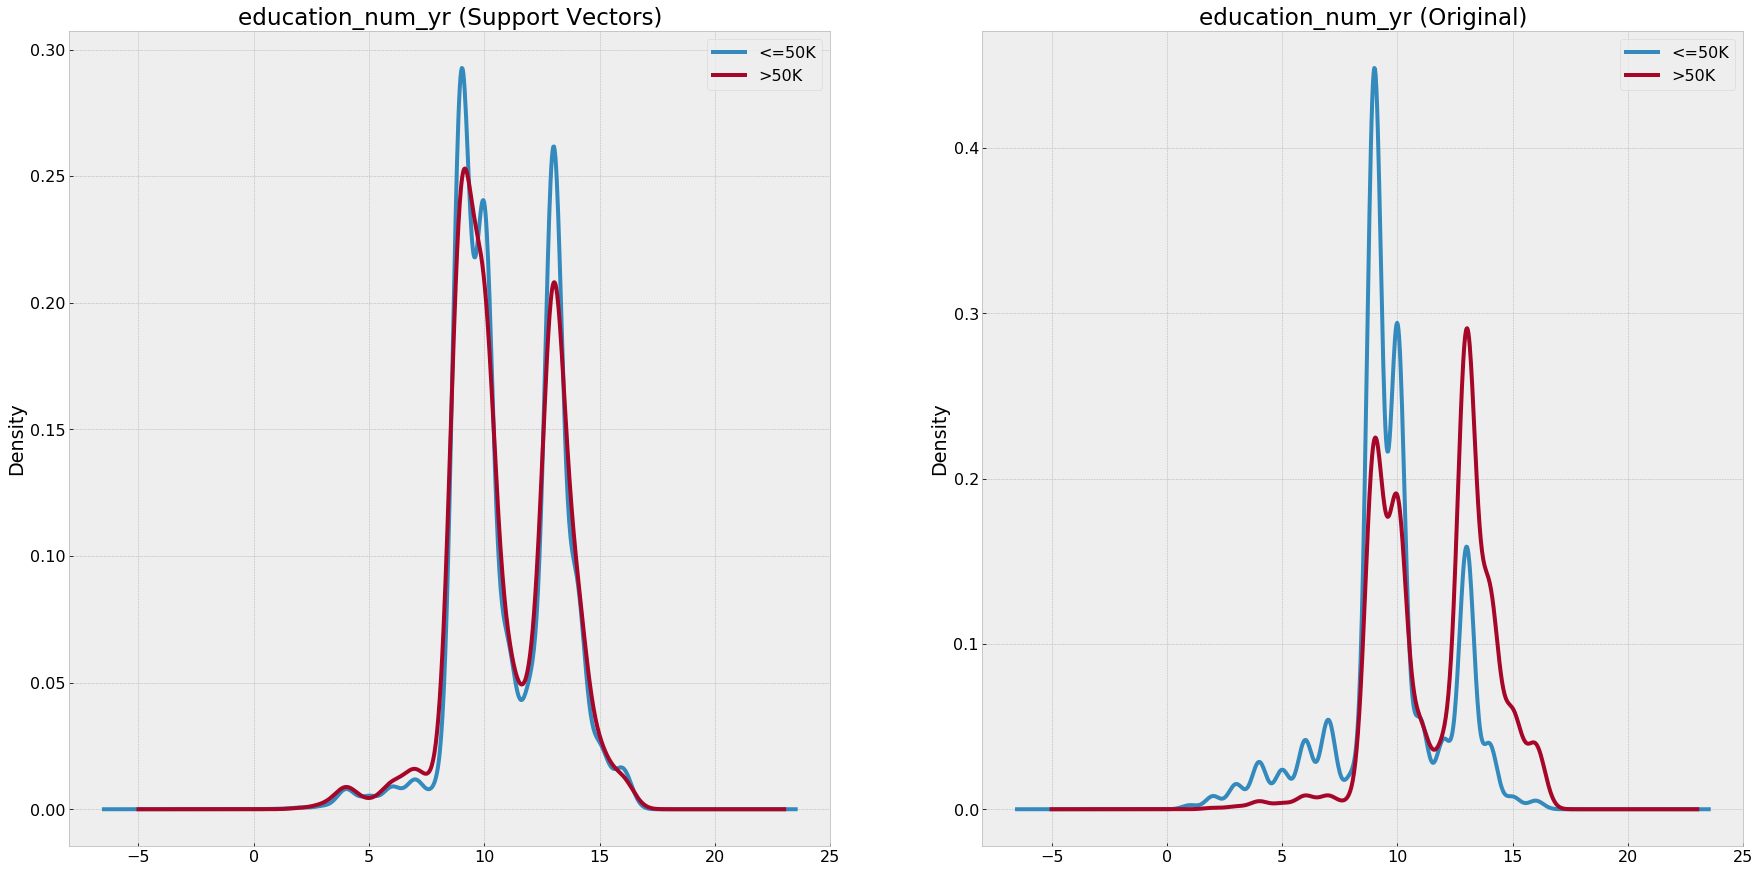

<Figure size 720x288 with 0 Axes>

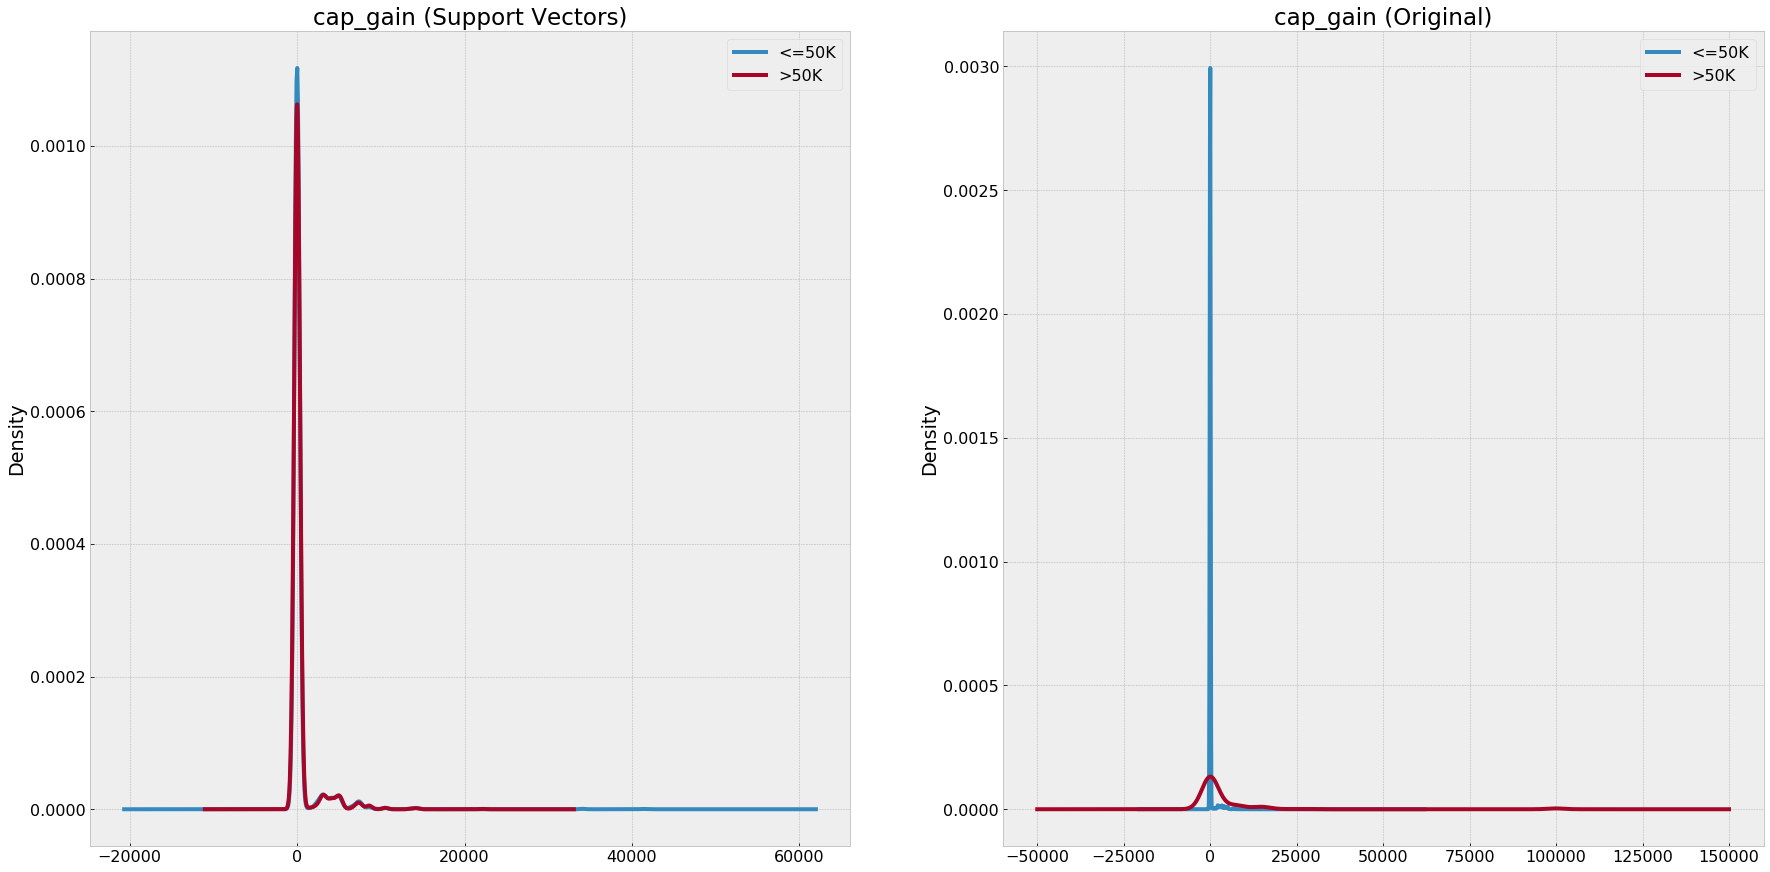

<Figure size 720x288 with 0 Axes>

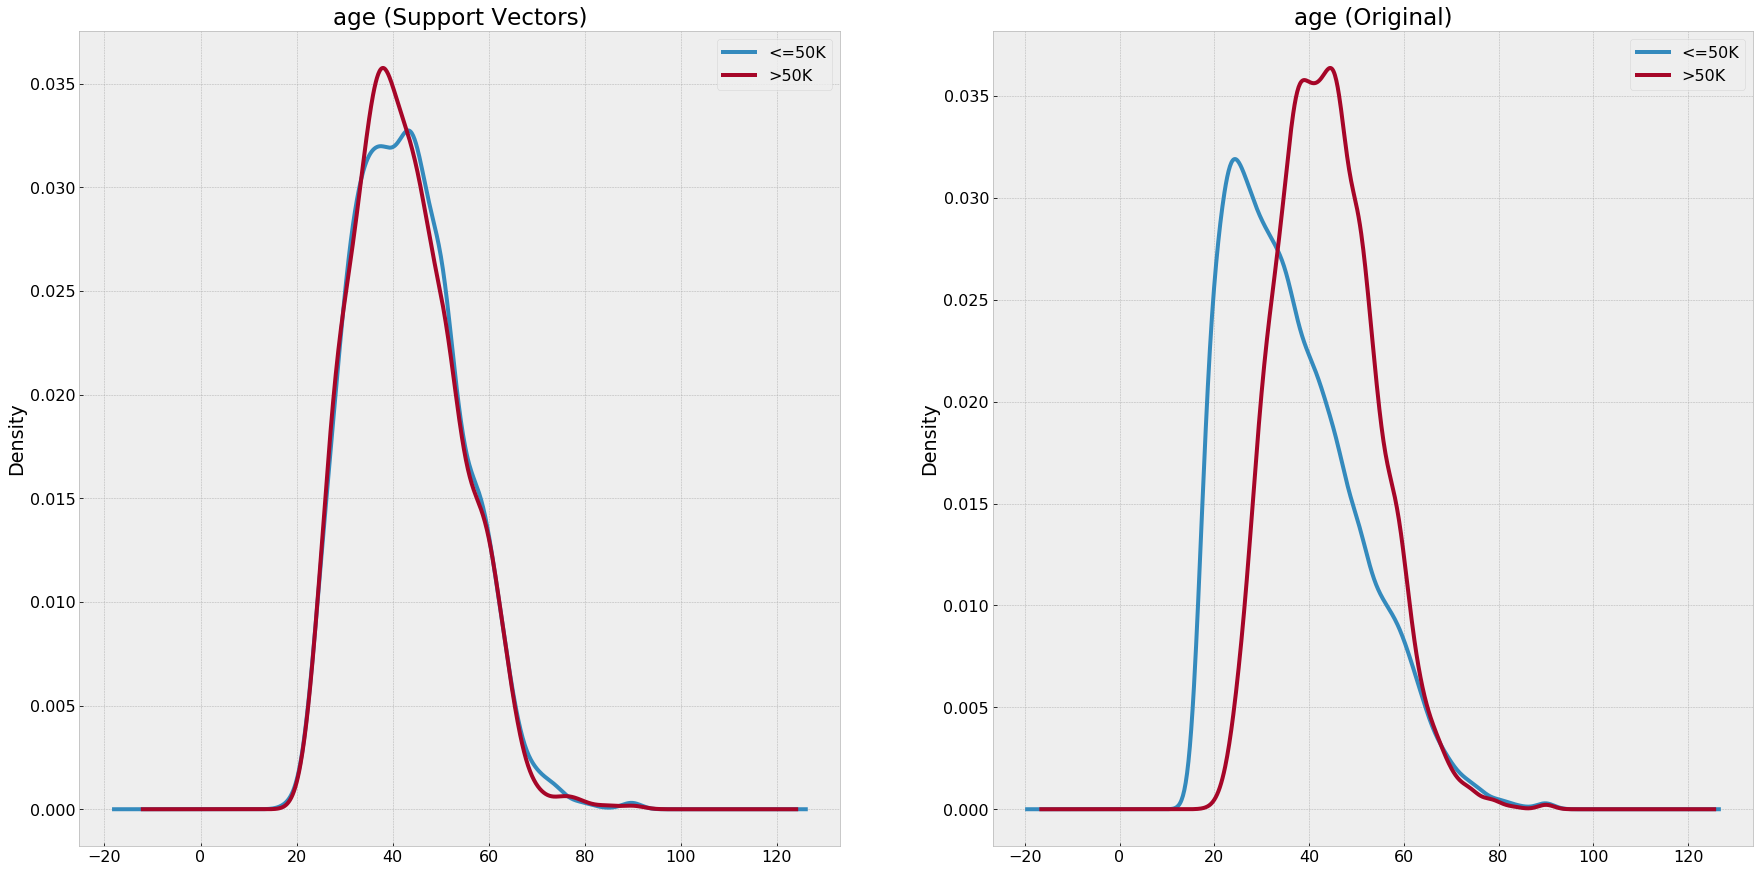

<Figure size 720x288 with 0 Axes>

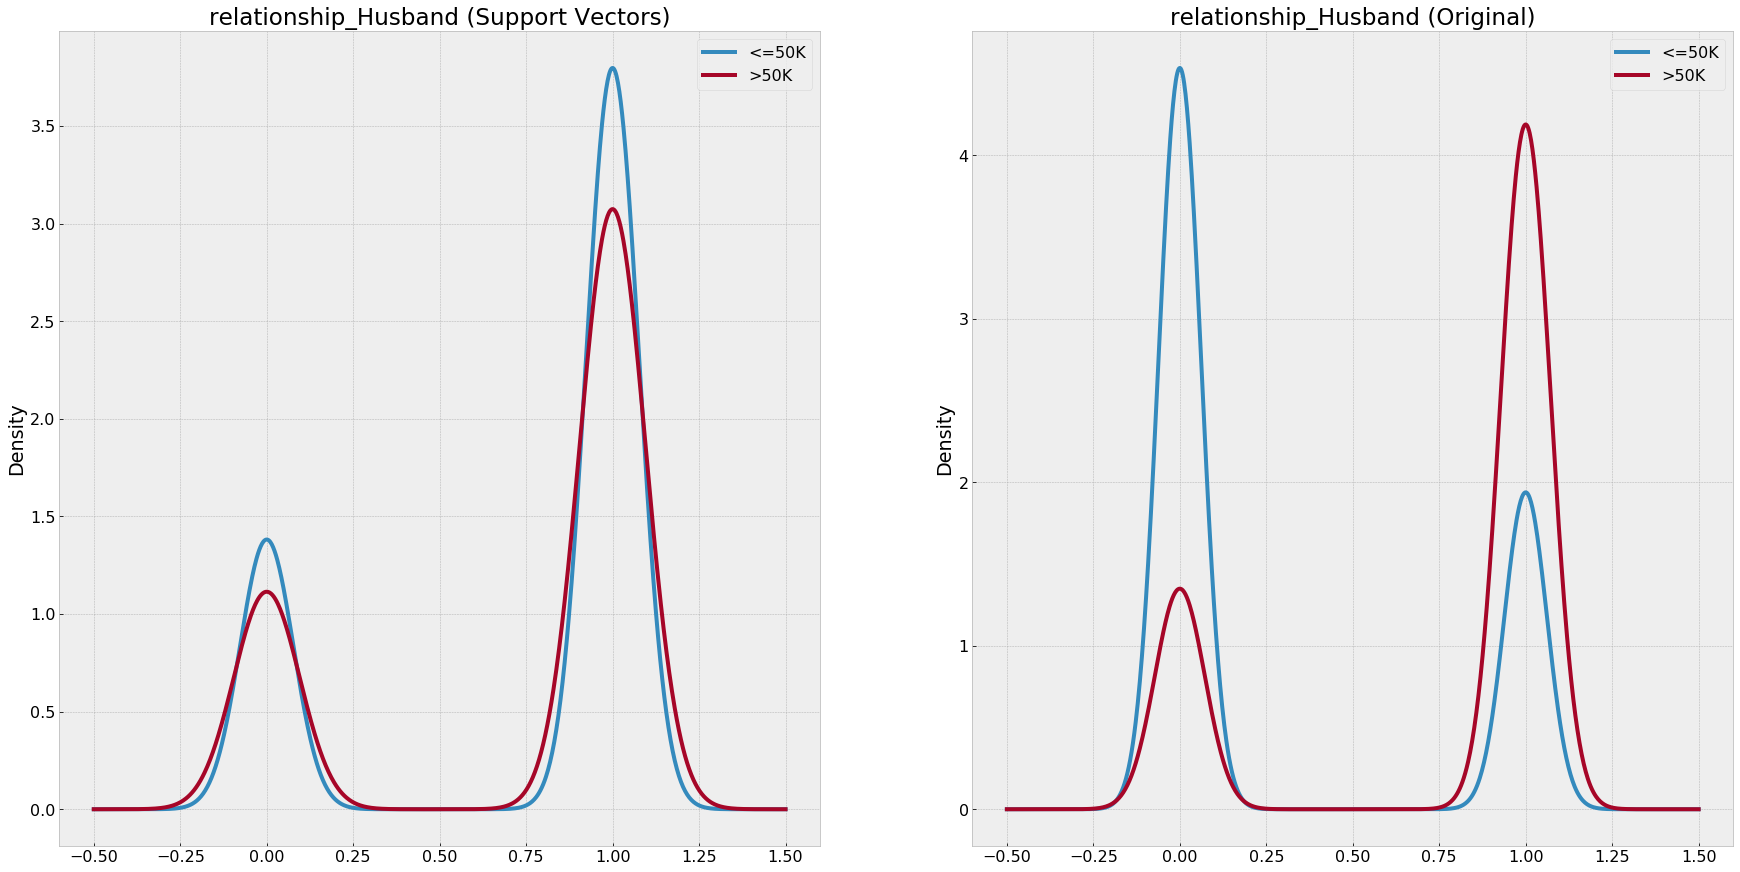

<Figure size 720x288 with 0 Axes>

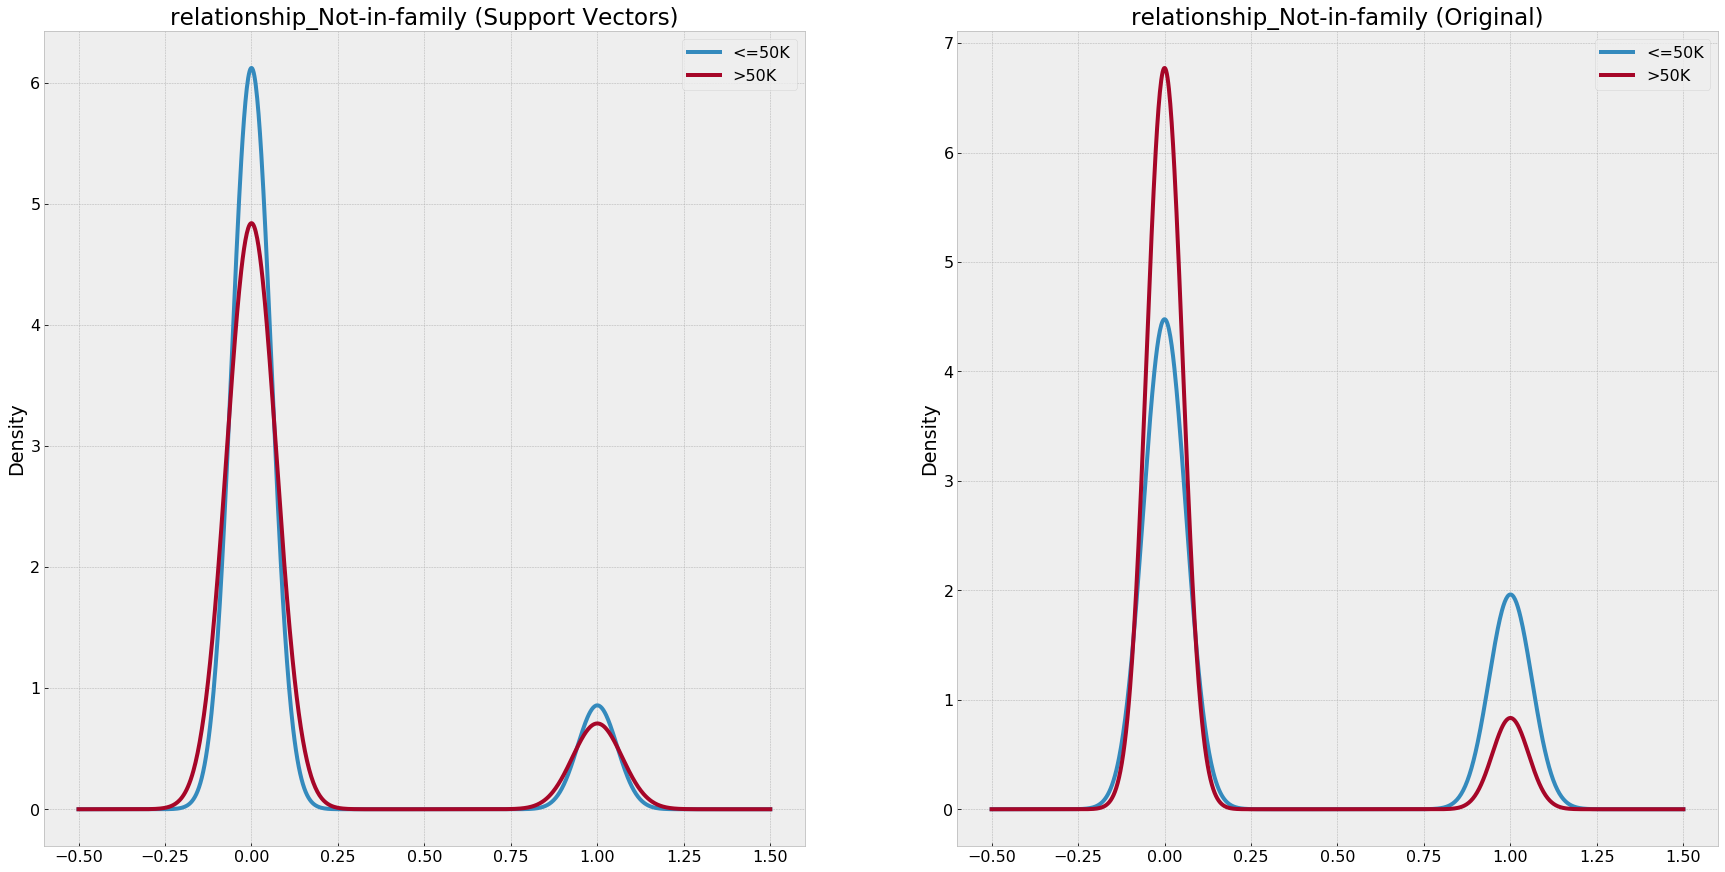

<Figure size 720x288 with 0 Axes>

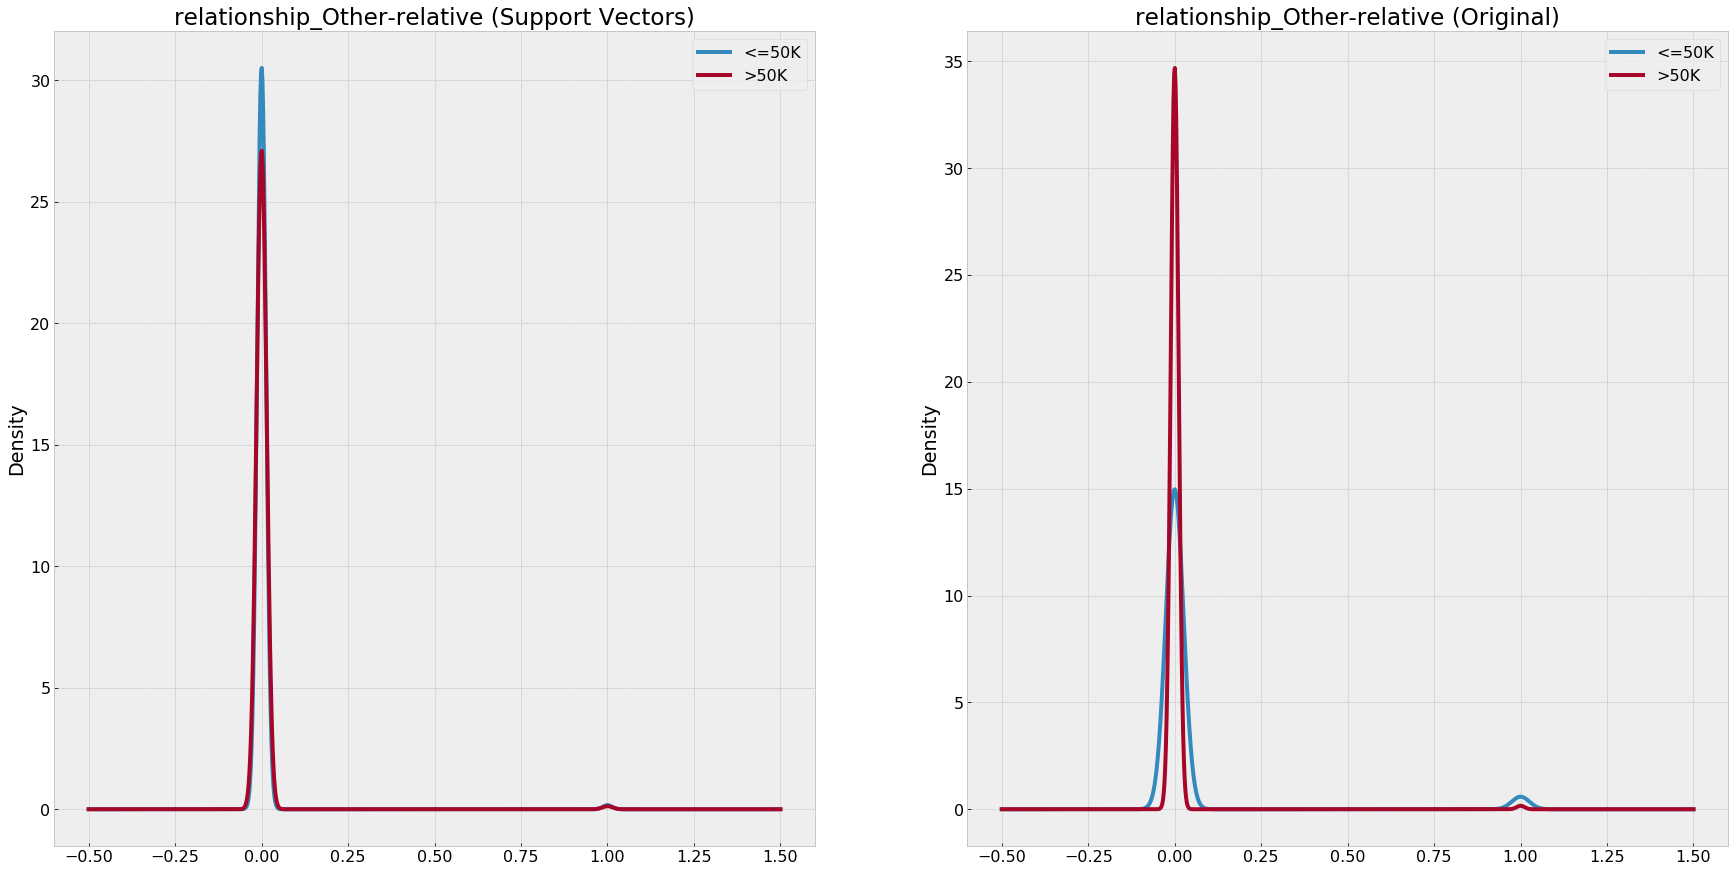

<Figure size 720x288 with 0 Axes>

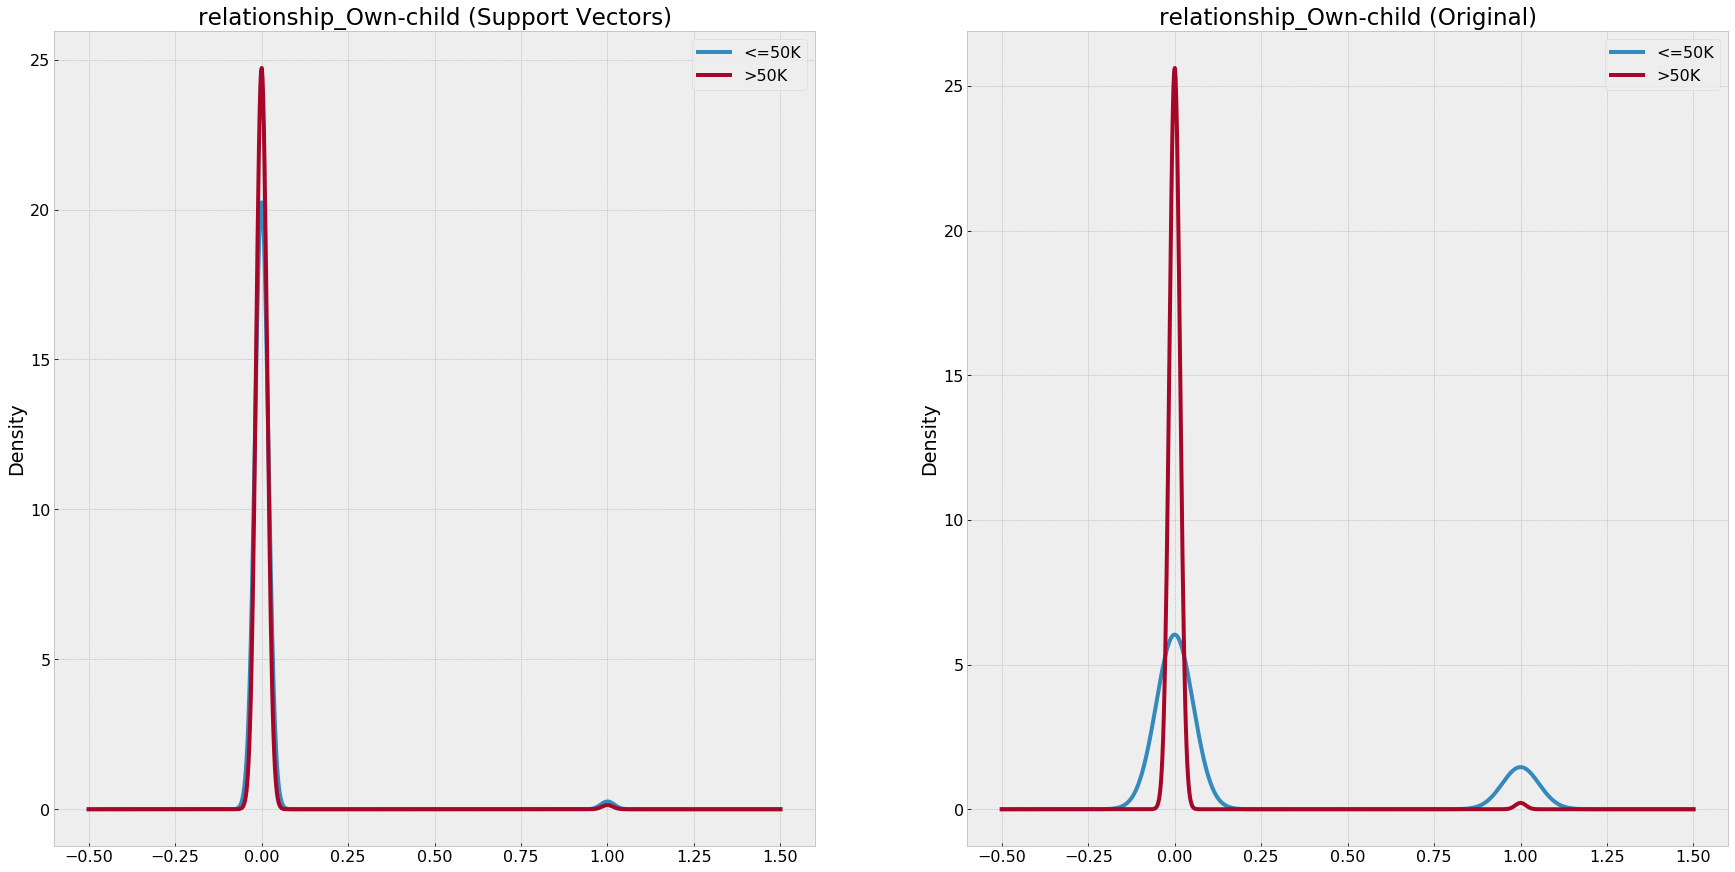

<Figure size 720x288 with 0 Axes>

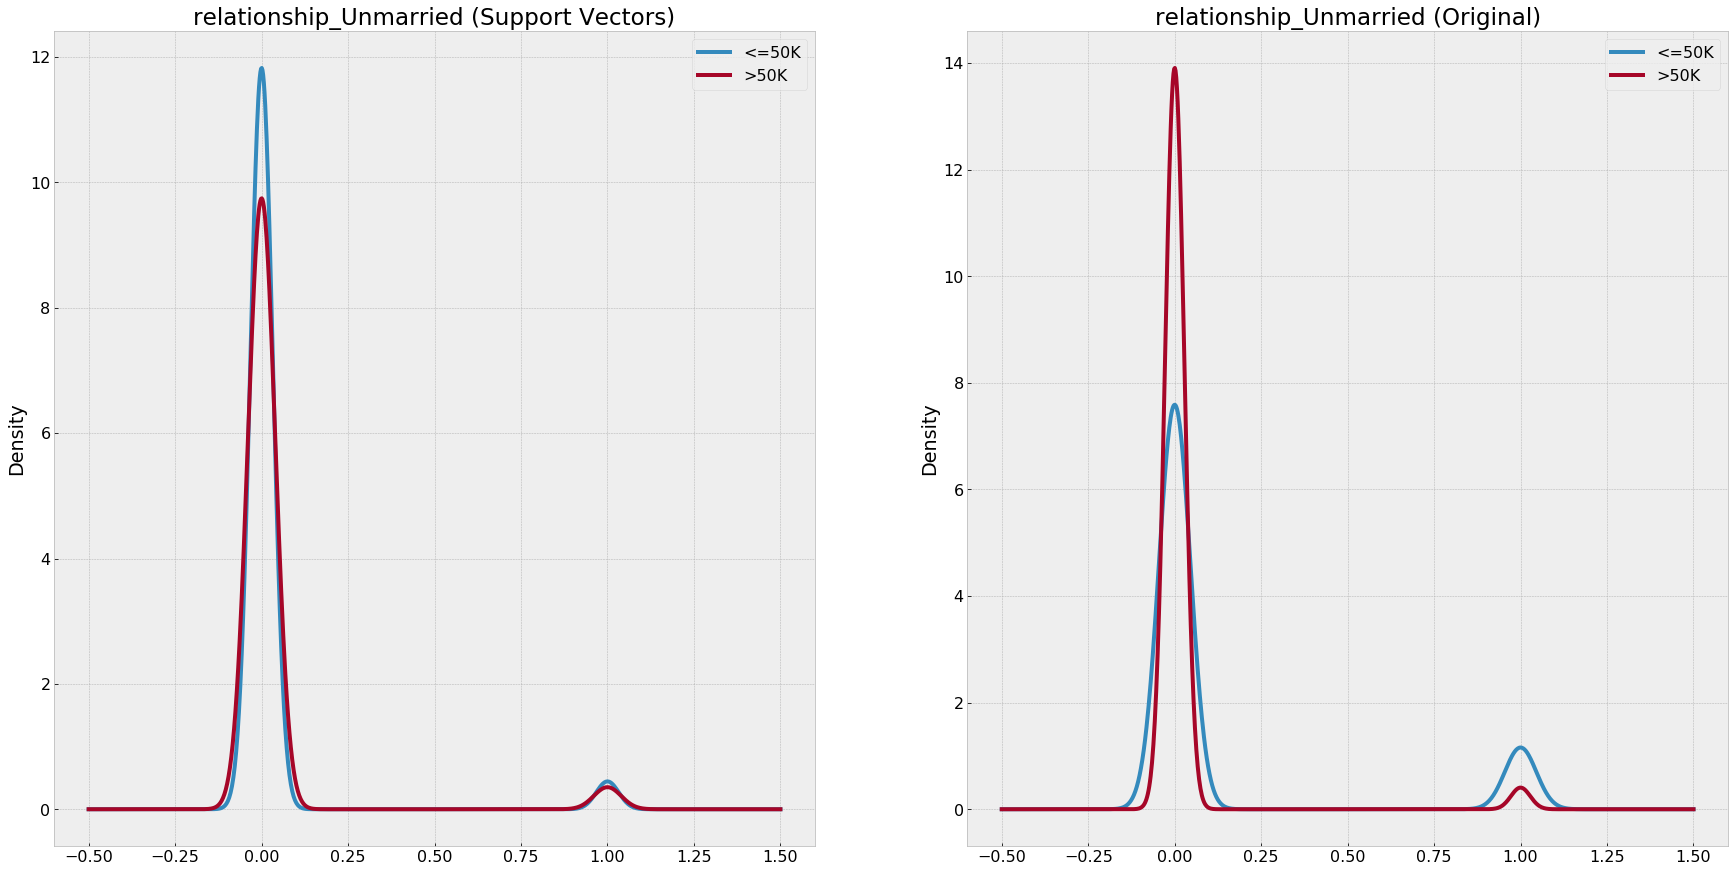

<Figure size 720x288 with 0 Axes>

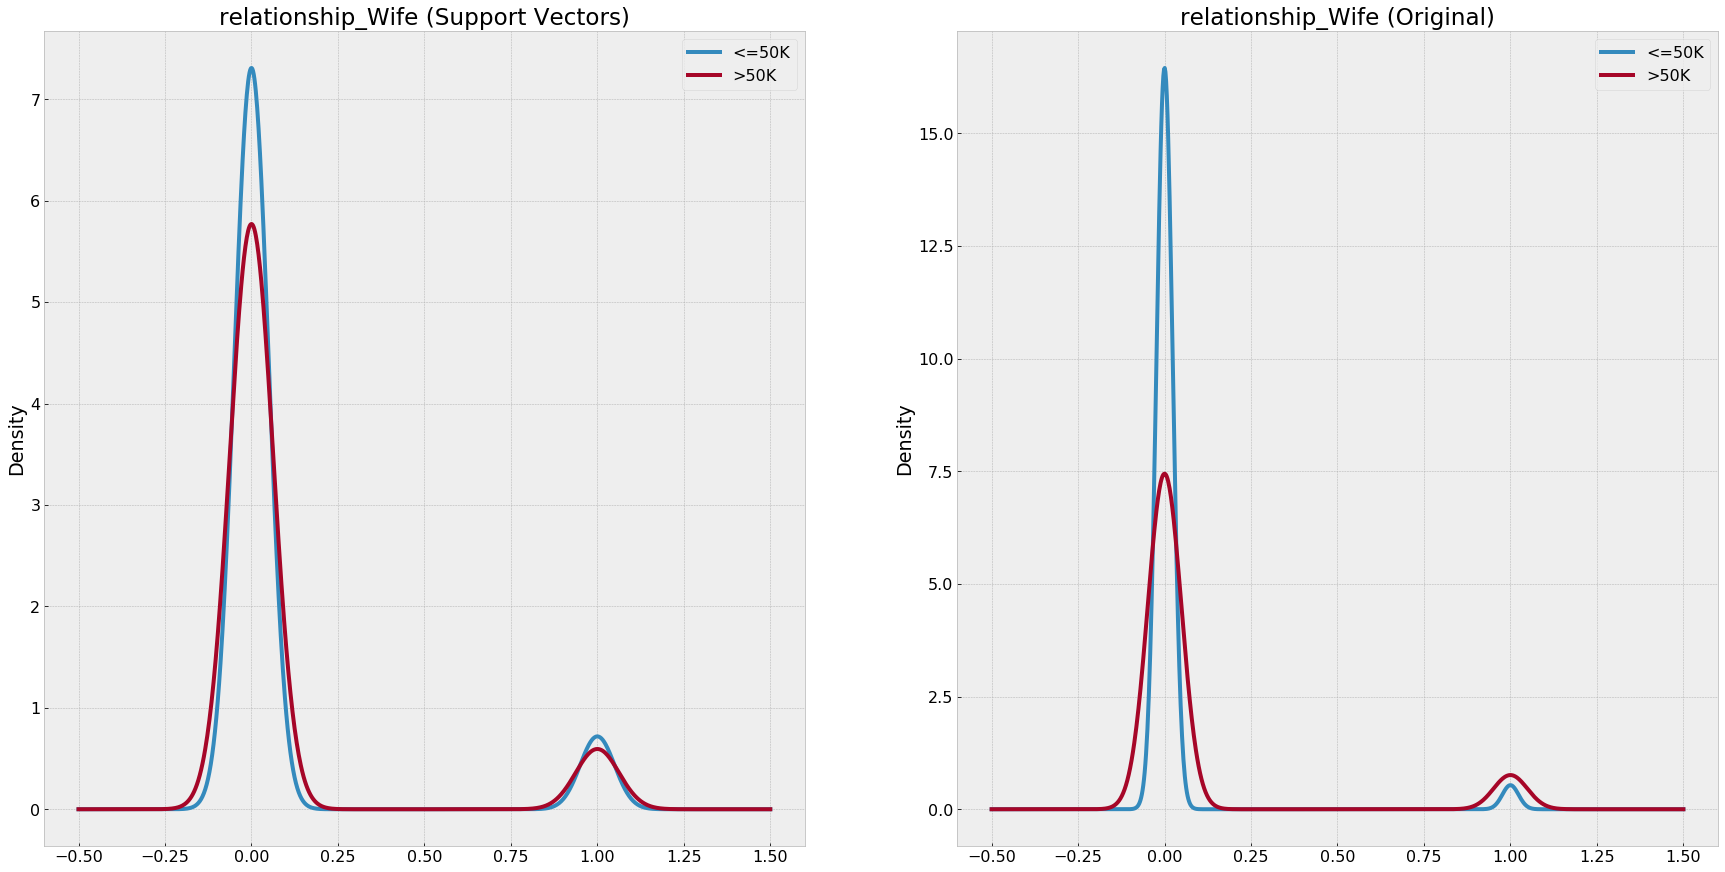

<Figure size 720x288 with 0 Axes>

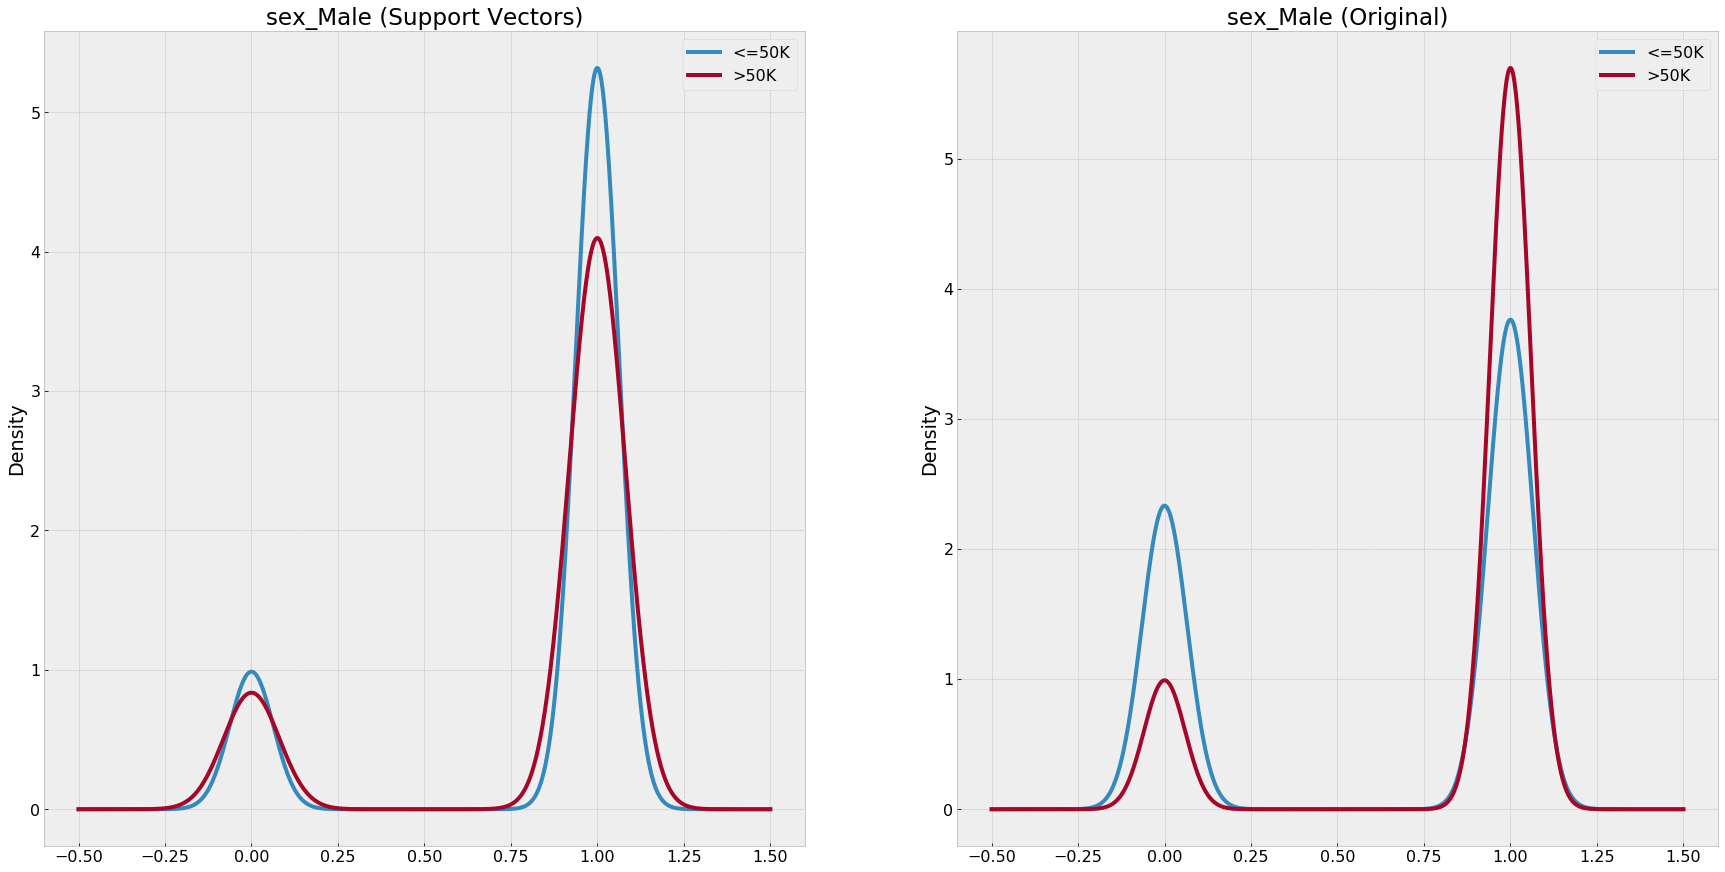

<Figure size 720x288 with 0 Axes>

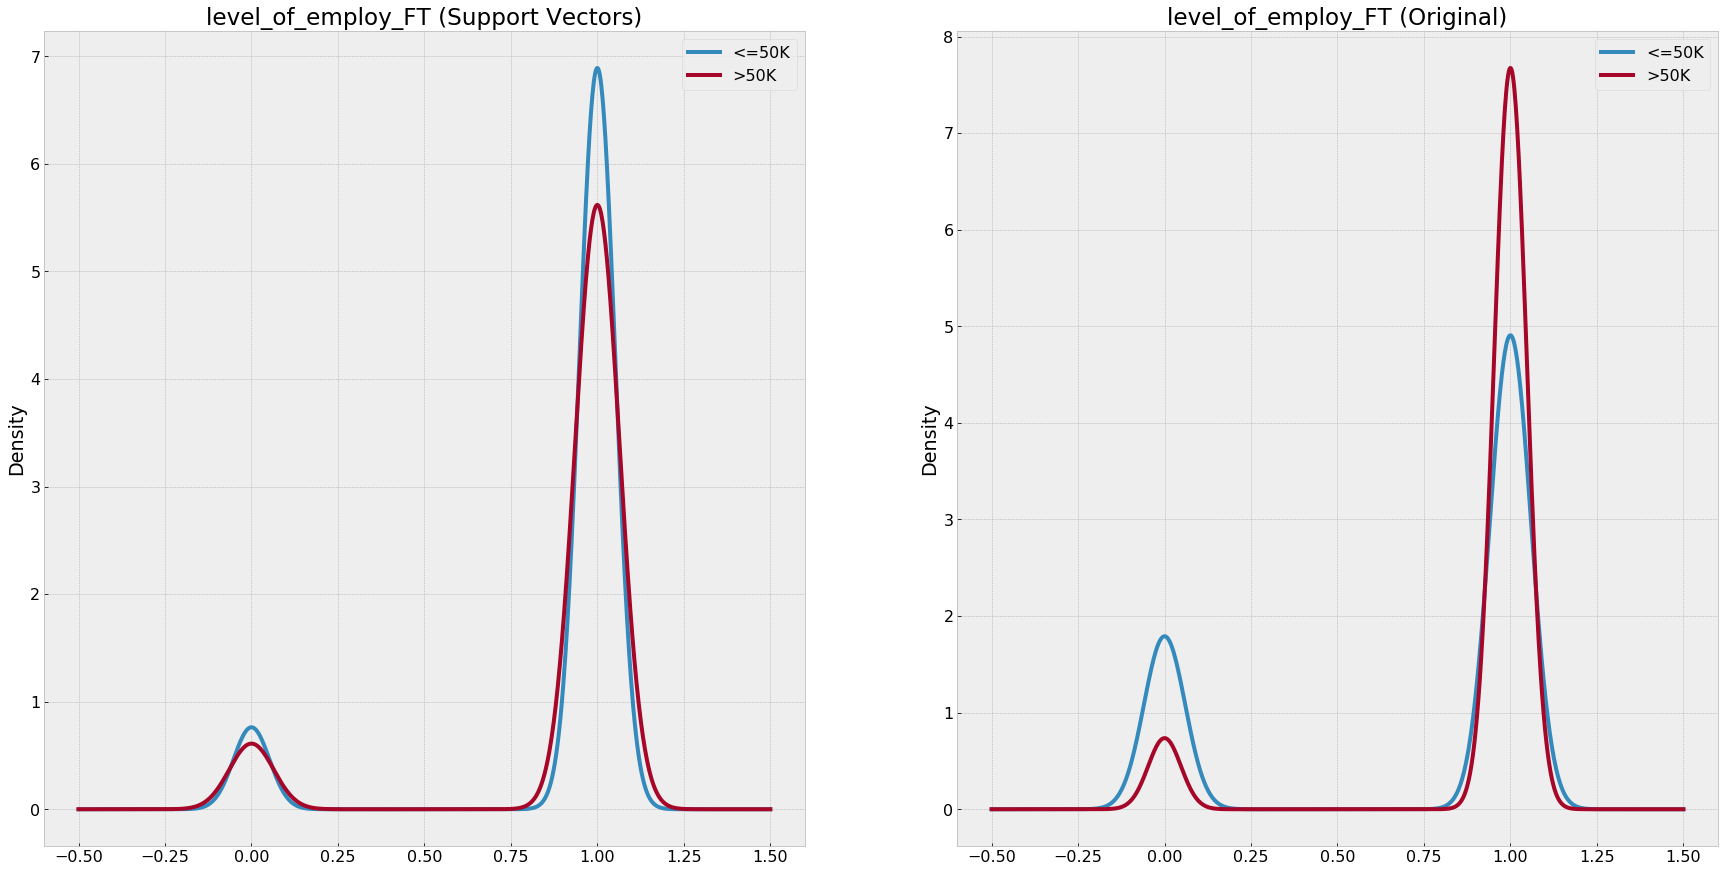

In [20]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In [21]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions

import time

svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    svm_clf.fit(X_train_scaled, y_train)  

    y_hat = svm_clf.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    print("====Iteration",iter_num," ====\n")
    print('accuracy:', acc )
    print(conf)

    

    print(elapsed_time)
    
    iter_num =+1
    
    

====Iteration 0  ====

accuracy: 0.8483341621084037
[[4263  314]
 [ 601  855]]
35.46966546499999
====Iteration 1  ====

accuracy: 0.8516492623901873
[[4294  267]
 [ 628  844]]
35.613792794000005
====Iteration 2  ====

accuracy: 0.8473396320238687
[[4229  274]
 [ 647  883]]
35.318001787000014


In [22]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions
import time
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

    t = time.process_time()
    
    svm_sgd.fit(X_train_scaled,y_train)
    yhat = svm_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    conf = mt.confusion_matrix(y_test,yhat)
    acc = mt.accuracy_score(y_test,yhat)
    
    
    print("====Iteration",iter_num," ====\n")
    print('SVM:', acc)
    print('Confusion Matrix \n', conf)

    print(elapsed_time)
    
    iter_num =+1

====Iteration 0  ====

SVM: 0.8335819658544671
Confusion Matrix 
 [[4286  268]
 [ 736  743]]
0.05121379999997089
====Iteration 1  ====

SVM: 0.8375600861926074
Confusion Matrix 
 [[4279  255]
 [ 725  774]]
0.160339227999998
====Iteration 2  ====

SVM: 0.838223106248964
Confusion Matrix 
 [[4265  260]
 [ 716  792]]
0.1650592600000209


In [23]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions
import time

log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    log_sgd.fit(X_train_scaled,y_train)
    yhat = log_sgd.predict(X_test_scaled)
    
    conf = mt.confusion_matrix(y_test,yhat)
    acc = mt.accuracy_score(y_test,yhat)
    
    print("====Iteration",iter_num," ====\n")
    print('Logistic Regression:', acc)
    print('Confusion Matrix \n', conf)
    
    print(elapsed_time)
    
    iter_num =+1

====Iteration 0  ====

Logistic Regression: 0.834410740924913
Confusion Matrix 
 [[4315  231]
 [ 768  719]]
0.1650592600000209
====Iteration 1  ====

Logistic Regression: 0.8332504558262888
Confusion Matrix 
 [[4301  210]
 [ 796  726]]
0.1650592600000209
====Iteration 2  ====

Logistic Regression: 0.8271175203049892
Confusion Matrix 
 [[4284  240]
 [ 803  706]]
0.1650592600000209


Rubric Sections

https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome
Create Models: 

50 PTS 

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

Model Advantages: 

10 PTS 

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Interpret Feature Importance: 

30 PTS 

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

Interpret Support Vectors: 

10 PTS 

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.